In [1]:
import pywt
import numpy as np
import glob
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
n =  1024
f = 17
s =  20
m =  680

In [3]:
segmented_data = np.repeat(np.nan, m*n).reshape(m,n)
num =0
for j in range(2,f+2):
    file = pd.read_csv(str(j)+ ".txt",sep='\s+', header=None)
    temp = file[1]
    temp = temp *(1000/0.215)
    for i in range(s):
        segmented_data[num,:] = temp[i*n:(i+1)*n]
        num = num+1

In [4]:
seg_data = pd.DataFrame(segmented_data)

In [5]:
seg_data

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,17.996563,9.102498,7.620153,7.620153,4.655465,7.620153,20.961251,26.890628,32.820005,35.784693,...,43.196414,38.749381,32.820005,31.337660,20.961251,16.514219,12.067186,12.067186,17.996563,23.925940
1,25.408284,31.337660,35.784693,43.196414,44.678758,43.196414,47.643447,47.643447,52.090479,55.055167,...,3.173121,3.173121,-2.756256,6.137809,10.584842,15.031874,19.478907,23.925940,25.408284,25.408284
2,28.372972,23.925940,19.478907,12.067186,7.620153,12.067186,15.031874,16.514219,15.031874,15.031874,...,34.302349,32.820005,37.267037,35.784693,34.302349,38.749381,35.784693,38.749381,38.749381,38.749381
3,32.820005,32.820005,31.337660,34.302349,28.372972,28.372972,23.925940,20.961251,23.925940,25.408284,...,-4.238600,-4.238600,1.690777,-2.756256,-1.273912,-4.238600,-4.238600,-2.756256,4.655465,10.584842
4,19.478907,17.996563,26.890628,38.749381,38.749381,32.820005,34.302349,26.890628,25.408284,29.855316,...,35.784693,32.820005,25.408284,20.961251,19.478907,16.514219,19.478907,20.961251,22.443595,25.408284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from scipy.fftpack import fft

In [7]:
file_2 = pd.read_csv(str(15)+ ".txt",sep='\s+', header=None)

In [8]:

sample_rate = 4096
N = (5-0)*sample_rate # 20480
freq = np.linspace(0,N,int(N/2))

tdf1 = file_2[1]
tdf2 = file_2[2]
tdf1 = tdf1*(1000/0.215)
tdf2 = tdf2*(1000/0.215)
freq1_2 = fft([tdf1])
freq2_2 = fft([tdf2])
freq1_2 = np.transpose(freq1_2)
freq2_2 = np.transpose(freq2_2)
y_1 = (5/N)*abs(freq1_2[0:np.int(N/2)])
y_2 = (5/N)*abs(freq2_2[0:np.int(N/2)])

    


C:\Users\prasu\AppData\Local\Temp/ipykernel_12588/2635103299.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_1 = (5/N)*abs(freq1_2[0:np.int(N/2)])
C:\Users\prasu\AppData\Local\Temp/ipykernel_12588/2635103299.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

ValueError: x and y must have same first dimension, but have shapes (10240,) and (1, 1024)

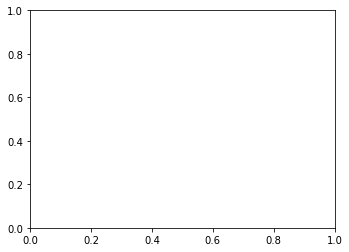

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(freq,y_1)
plt.ylabel('Pressure(Pa)') 
plt.xlabel('Time (Seconds)') 
plt.title('At 450 mm with 200 SLPM')
plt.subplot(122)
plt.plot(freq,y_2)
plt.ylabel('Pressure(Pa)') 
plt.xlabel('Ferequency (Hz)')
plt.title('At 650 mm with 200 SLPM')

plt.savefig('Thermoacoustic_freq_2.jpg', dpi = 400) 
plt.show()

In [10]:

sample_rate = 4096
N = (5-0)*sample_rate # 20480
freq = np.linspace(0,n,int(N/2))

tdf1 = file_2[1][0:1024]
tdf2 = file_2[2][0:1024]
tdf1 = tdf1*(1000/0.215)
tdf2 = tdf2*(1000/0.215)
freq1_2 = fft([tdf1])
freq2_2 = fft([tdf2])
freq1_2 = np.transpose(freq1_2)
freq2_2 = np.transpose(freq2_2)
y_1 = (5/N)*abs(freq1_2[0:np.int(N/2)])
y_2 = (5/N)*abs(freq2_2[0:np.int(N/2)])
y_1 = np.transpose(y_1)
y_2 = np.transpose(y_2)

C:\Users\prasu\AppData\Local\Temp/ipykernel_16652/1571022259.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_1 = (5/N)*abs(freq1_2[0:np.int(N/2)])
C:\Users\prasu\AppData\Local\Temp/ipykernel_16652/1571022259.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the releas

ValueError: x and y must have same first dimension, but have shapes (10240,) and (1, 1024)

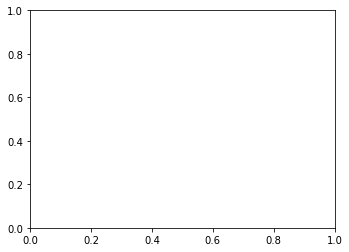

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(freq,y_1)
plt.ylabel('Pressure(Pa)') 
plt.xlabel('Time (Seconds)') 
plt.title('At 450 mm with 200 SLPM')
plt.subplot(122)
plt.plot(freq,y_2)
plt.ylabel('Pressure(Pa)') 
plt.xlabel('Ferequency (Hz)')
plt.title('At 650 mm with 200 SLPM')

plt.savefig('Thermoacoustic_freq_2.jpg', dpi = 400) 
plt.show()

In [54]:
fr = np.arange(0,100,11)

In [55]:
print(fr)

[ 0 11 22 33 44 55 66 77 88 99]


In [60]:
f1 = np.linspace(0,N,int(N/2))

In [61]:
len(f1)

10240

ValueError: x and y must have same first dimension, but have shapes (2048,) and (1, 4096)

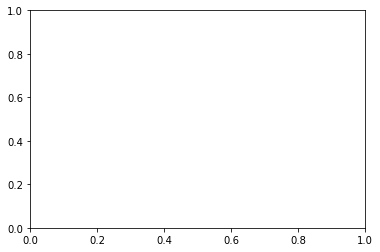

In [64]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 4096
# sample spacing
T = 1.0 / 4096
x = np.linspace(0.0, N*T, N, endpoint=False)
tdf1 = file_2[1][0:4096]
tdf1 = tdf1*(1000/0.215)
yf = fft([tdf1])
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()